# OpenAnnotateApi reveals cell type-specificity of regulatory elements 

## K562

### Import annotation data

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

head = pd.read_csv('./K562/head.txt', sep='\t',header=None)
readopen = pd.read_csv('./K562/readopen.txt', sep='\t',header=None)

In [2]:
head

,0,1,2,3,4,5,6,7
0,ENCFF283EIF,ENCBS217AEF,ENCSR620QNS,DHS,EFO:0007598,HAP-1,Blood,Circulatory system
1,ENCFF726CQE,ENCBS912MMS,ENCSR620QNS,DHS,EFO:0007598,HAP-1,Blood,Circulatory system
2,ENCFF295KVW,ENCBS299YQN,ENCSR458LIB,DHS,EFO:0005724,MM.1S,Blood,Circulatory system
3,ENCFF450BQU,ENCBS523NFL,ENCSR458LIB,DHS,EFO:0005724,MM.1S,Blood,Circulatory system
4,ENCFF666DAH,ENCBS457ZNO,ENCSR594NOE,DHS,EFO:0002322,RPMI8226,Blood,Circulatory system
...,...,...,...,...,...,...,...,...
866,ENCFF426THL,ENCBS855RFN,ENCSR540PVZ,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system
867,ENCFF429HAZ,ENCBS145EYH,ENCSR752NTF,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system
868,ENCFF323WSL,ENCBS935VKR,ENCSR761ZFA,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system
869,ENCFF953JVC,ENCBS827OFK,ENCSR986HEN,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system


In [3]:
readopen

,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
0,chr1,772694,772873,.,0.0000,0.8144,0.05850,0.00000,0.1242,0.0000,...,0.0000,0.0000,0.0000,0.3670,0.0000,0.0000,0.2842,0.0000,0.0000,0.2611
1,chr1,950916,951136,.,1.8290,2.7390,0.27520,0.15920,0.6262,0.5461,...,2.7190,2.1100,1.9550,3.4270,3.2920,2.3570,2.1360,2.6150,2.5820,2.3110
2,chr1,968588,968708,.,27.8300,27.9400,9.60500,9.46500,24.0600,31.2500,...,22.9200,21.2000,9.6750,20.8800,15.5300,18.5100,12.6800,16.5200,19.7000,17.1300
3,chr1,989815,989997,.,0.8191,1.0800,0.01793,0.09565,0.1073,0.2044,...,0.1787,1.0380,0.3292,0.8107,0.3234,0.8328,0.6307,0.2809,0.5536,0.9744
4,chr1,1017301,1017480,.,1.6840,0.9128,0.19920,0.48220,0.3233,0.2685,...,0.3555,0.0000,1.2980,0.8020,0.6402,0.2748,0.2076,0.0000,0.2749,0.1936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,chrX,151154521,151154740,.,0.3945,0.0000,0.00000,0.00000,5.3830,2.9490,...,3.4970,2.7600,2.1690,4.0320,0.0000,3.4420,4.0660,4.4530,1.2990,5.8000
6920,chrX,152010347,152010520,.,0.8857,2.4160,0.47760,1.04000,1.7240,0.0000,...,0.8322,1.2140,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6921,chrX,153234675,153234853,.,4.4540,3.3770,2.28100,1.89000,4.7930,3.9460,...,0.2575,2.8440,0.9878,2.5710,2.5240,1.8120,3.1270,2.9880,0.9018,0.2954
6922,chrX,153362776,153363014,.,3.5360,2.5120,3.01300,0.57060,2.5090,3.2090,...,3.9830,1.4530,2.7160,5.8950,6.1560,4.1960,4.0680,3.6030,2.0860,1.8210


In [4]:
cell_lines = head[5]
cell_line = cell_lines.unique()
other_cell_line = cell_line[cell_line != 'K562']

z = readopen.iloc[:, 4:].values.astype(float)
r_new = np.zeros((z.shape[0], len(cell_line)))

tmp = np.where(cell_lines == 'K562')[0]
r_new[:, 0] = np.mean(z[:, tmp], axis=1)

for j, new_cl in enumerate(other_cell_line):
    tmp = np.where(cell_lines == new_cl)[0]
    if len(tmp) == 1:
        r_new[:, j+1] = z[:, tmp[0]]
    else:
        r_new[:, j+1] = np.mean(z[:, tmp], axis=1)

f_t = np.zeros(len(other_cell_line))
f_g = np.zeros(len(other_cell_line))

for i in range(len(f_t)):
    f_t[i] = wilcoxon(r_new[:, 0], r_new[:, i+1], alternative='two-sided')[1]
    f_g[i] = wilcoxon(r_new[:, 0], r_new[:, i+1], alternative='greater')[1]

f_t_corr = multipletests(f_t, method='fdr_bh')[1]
f_g_corr = multipletests(f_g, method='fdr_bh')[1]

threshold = 0.05
num = [np.sum(f_t_corr < threshold), np.sum(f_g_corr < threshold)]

In [5]:
i = 44
wilcoxon(r_new[:, 0], r_new[:, i+1], alternative='greater')[1]

1.0823214178550398e-83

In [6]:
print(other_cell_line)

['HAP-1' 'MM.1S' 'RPMI8226' 'Cardiac fibroblast' 'Heart'
 'Heart left ventricle' 'Cardiac mesoderm' 'Cardiac muscle cell'
 'Brain microvascular endothelial cell' 'Brain pericyte'
 'Dermis blood vessel endothelial cell'
 'Lung microvascular endothelial cell' 'Pulmonary artery endothelial cell'
 'Smooth muscle cell of the brain vasculature'
 'Fibroblast of pulmonary artery' 'Fibroblast of the aortic adventitia'
 'Endothelial cell of umbilical vein' 'HL-60' 'Jurkat clone E61' 'KBM-7'
 'NB4' 'CD1c-positive myeloid dendritic cell'
 'Common myeloid progenitor, CD34-positive' 'HS-27A' 'HS-5' 'L1-S8'
 'Stromal cell of bone marrow' 'BE2C' 'Karpas-422' 'NAMALWA' 'OCI-LY7'
 'Spleen' 'Dermis microvascular lymphatic vessel endothelial cell'
 'Epithelial cell of esophagus' 'Esophagus squamous epithelium' 'Caco-2'
 'HCT116' 'HT-29' 'LoVo' 'RKO' 'SW480' 'Sigmoid colon' 'Transverse colon'
 'Large intestine' 'HepG2' 'Hepatocyte' 'Right lobe of liver'
 'Fibroblast of gingiva' 'Body of pancreas' 'Panc1' '

### Plot the p-value distribution

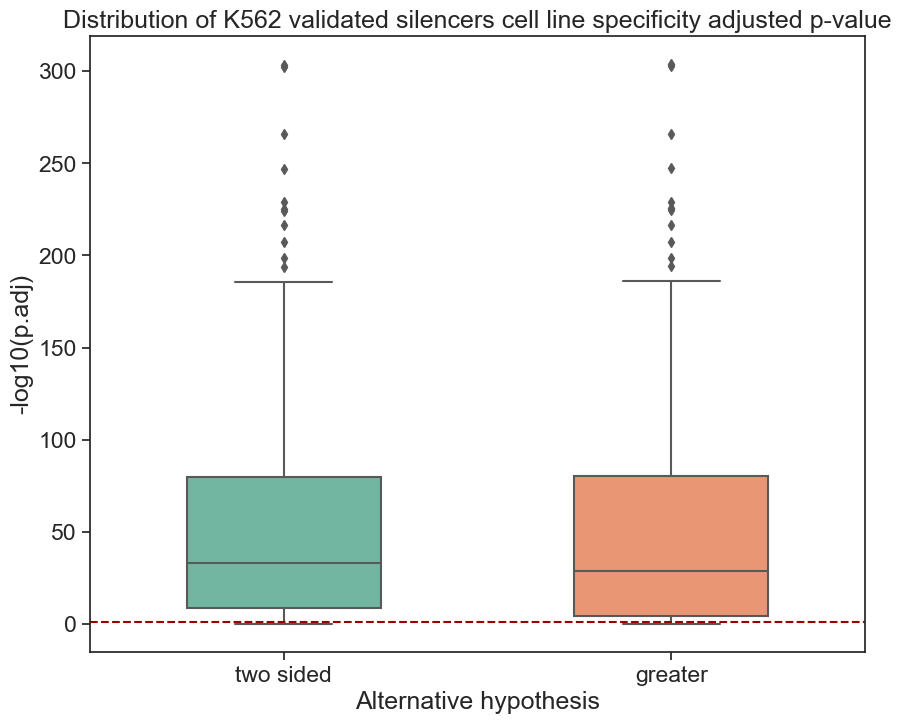

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'f_t_corr' and 'f_g_corr' are lists or arrays containing corrected p-values from the previous Python code
sns.set_theme(style='ticks',font_scale=1.5)
t = pd.DataFrame({'p_value': np.concatenate([f_t_corr, f_g_corr]),
                  'name': np.concatenate([np.repeat('two sided', len(f_t_corr)),
                                           np.repeat('greater', len(f_g_corr))])})

plt.figure(figsize=(10, 8))
sns.boxplot(data=t, x='name', y=-np.log10(t['p_value']), palette="Set2", width=0.5)
plt.title("Distribution of K562 validated silencers cell line specificity adjusted p-value")
plt.xlabel('Alternative hypothesis')
plt.ylabel('-log10(p.adj)')
# plt.ylim(0, 100)
plt.axhline(-np.log10(0.05), color="#990000", linestyle="dashed")
plt.savefig('pvalue_K562.png',dpi=450)
plt.show()

In [8]:
cell_lines = head[5]
cell_line = cell_lines.unique()
new_cell_line = cell_line[cell_line != 'K562']

z = readopen.iloc[:, 4:].values.astype(float)
r_new = np.zeros((z.shape[0], len(cell_line)))

tmp = np.where(cell_lines == 'K562')[0]
r_new[:, 0] = np.mean(z[:, tmp], axis=1)

for j, new_cl in enumerate(new_cell_line):
    tmp = np.where(cell_lines == new_cl)[0]
    if len(tmp) == 1:
        r_new[:, j+1] = z[:, tmp[0]]
    else:
        r_new[:, j+1] = np.mean(z[:, tmp], axis=1)

In [9]:
np.where(new_cell_line == 'HepG2')
f_g[44]

1.0823214178550398e-83

In [10]:
np.median(r_new[:,45])

0.6440785714285715

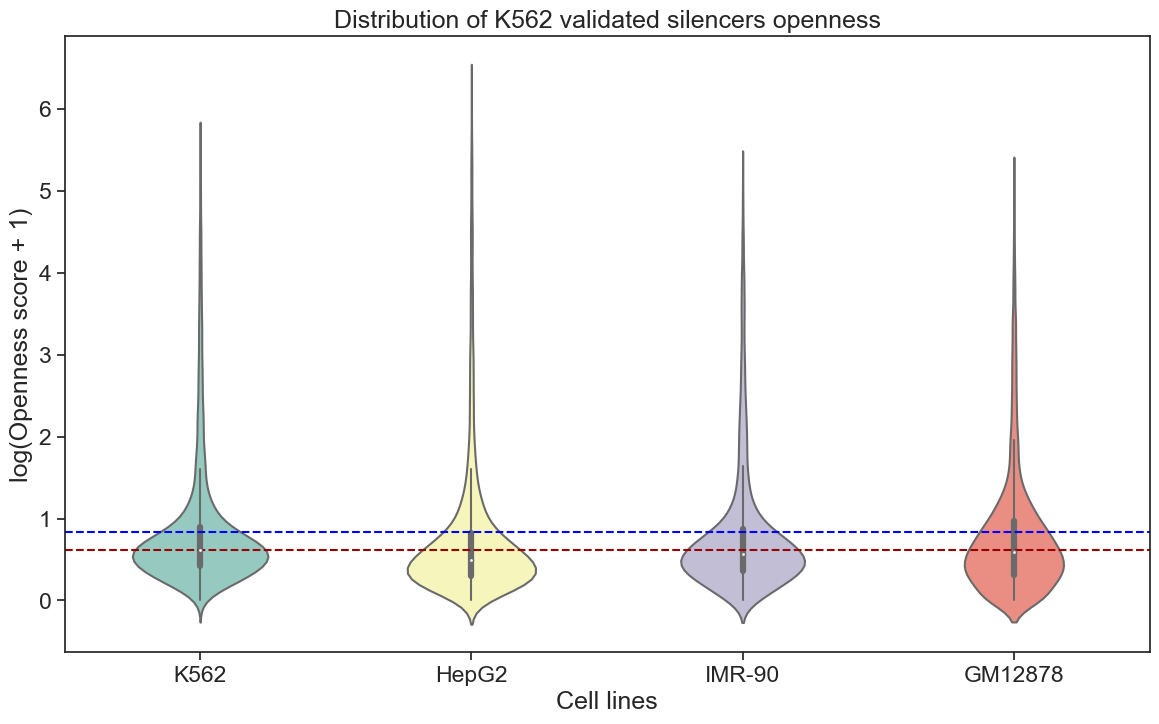

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'f_t_corr' and 'f_g_corr' are lists or arrays containing corrected p-values from the previous Python code
sns.set_theme(style='ticks',font_scale=1.5)
t = pd.DataFrame({'openness': np.concatenate([r_new[:,0], r_new[:,45],r_new[:,158],r_new[:,64]]),
                  'name': np.concatenate([np.repeat('K562', len(r_new[:,0])),
                                           np.repeat('HepG2', len(r_new[:,0])),
                                         np.repeat('IMR-90', len(r_new[:,0])),
                                         np.repeat('GM12878', len(r_new[:,0]))])})

plt.figure(figsize=(14, 8))
sns.violinplot(data=t, x='name', y=np.log(t['openness']+1), palette="Set3", width=0.5)
plt.title("Distribution of K562 validated silencers openness")
plt.xlabel('Cell lines')
plt.ylabel('log(Openness score + 1)')
# plt.ylim(0, 100)
plt.axhline(np.median(np.log(r_new[:,0]+1)), color="#990000", linestyle="dashed")
plt.axhline(np.mean(np.log(r_new[:,0]+1)), color="blue", linestyle="dashed")

plt.savefig('distribution_K562.png',dpi=450)
plt.show()

## HepG2

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

head = pd.read_csv('./HepG2/head.txt', sep='\t',header=None)
readopen = pd.read_csv('./HepG2/readopen.txt', sep='\t',header=None)
head

,0,1,2,3,4,5,6,7
0,ENCFF283EIF,ENCBS217AEF,ENCSR620QNS,DHS,EFO:0007598,HAP-1,Blood,Circulatory system
1,ENCFF726CQE,ENCBS912MMS,ENCSR620QNS,DHS,EFO:0007598,HAP-1,Blood,Circulatory system
2,ENCFF295KVW,ENCBS299YQN,ENCSR458LIB,DHS,EFO:0005724,MM.1S,Blood,Circulatory system
3,ENCFF450BQU,ENCBS523NFL,ENCSR458LIB,DHS,EFO:0005724,MM.1S,Blood,Circulatory system
4,ENCFF666DAH,ENCBS457ZNO,ENCSR594NOE,DHS,EFO:0002322,RPMI8226,Blood,Circulatory system
...,...,...,...,...,...,...,...,...
866,ENCFF426THL,ENCBS855RFN,ENCSR540PVZ,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system
867,ENCFF429HAZ,ENCBS145EYH,ENCSR752NTF,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system
868,ENCFF323WSL,ENCBS935VKR,ENCSR761ZFA,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system
869,ENCFF953JVC,ENCBS827OFK,ENCSR986HEN,DHS,UBERON:0018116,Right renal pelvis,Kidney,Urinary system


In [13]:
readopen

,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
0,chr1,833348,833508,.,1.4190,1.7710,0.06392,0.1148,0.2662,0.03514,...,0.2408,0.8470,1.3330,0.36480,0.4374,0.3758,0.8594,0.3754,0.7452,1.3100
1,chr1,1370998,1371187,.,7.6770,8.4700,0.62450,0.0000,1.1500,4.46300,...,11.8800,9.0650,6.9250,6.58800,9.8740,10.8400,8.7980,7.9010,8.4860,3.2350
2,chr1,1537005,1537147,.,0.2678,0.3842,0.35920,3.2190,0.7240,0.18860,...,0.0000,0.0000,1.2620,0.35360,0.8266,0.3580,0.2786,0.7481,0.0000,0.2625
3,chr1,1721473,1721656,.,0.7511,0.2935,0.35150,0.2834,0.2060,0.14710,...,0.1703,0.5616,0.3001,0.25310,0.0000,0.7647,0.0000,0.2651,0.0000,0.0000
4,chr1,1871092,1871328,.,0.6307,0.8065,0.35810,0.0000,0.5246,0.34580,...,0.1404,0.4583,0.0000,0.21050,0.7145,0.0000,0.1686,0.2156,0.4224,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,chr19,45411721,45412600,+,0.3409,0.5556,0.42420,0.2182,0.6584,0.61590,...,0.3156,0.2617,0.1704,0.05321,0.3047,0.4924,0.4992,0.3164,0.4328,0.3410
1675,chr2,128175834,128175914,+,0.1949,1.2960,0.00000,0.0000,1.0680,1.43900,...,1.1190,2.3250,2.2050,0.00000,0.8654,0.8506,0.6653,0.0000,0.7846,0.8941
1676,chr4,155534467,155534509,-,0.0000,0.0000,0.00000,0.0000,0.0000,1.29600,...,4.2520,2.4500,0.0000,0.00000,0.0000,0.0000,2.5470,0.0000,0.0000,1.2530
1677,chrX,11551258,11551578,-,32.0700,33.4400,59.98000,26.7800,28.8100,28.13000,...,38.3100,29.0700,26.0100,37.27000,30.8200,28.3200,23.4500,29.2500,24.4300,23.4100


In [14]:
cell_lines = head[5]
cell_line = cell_lines.unique()
new_cell_line = cell_line[cell_line != 'HepG2']

z = readopen.iloc[:, 4:].values.astype(float)
r_new = np.zeros((z.shape[0], len(cell_line)))

tmp = np.where(cell_lines == 'HepG2')[0]
r_new[:, 0] = np.mean(z[:, tmp], axis=1)

for j, new_cl in enumerate(new_cell_line):
    tmp = np.where(cell_lines == new_cl)[0]
    if len(tmp) == 1:
        r_new[:, j+1] = z[:, tmp[0]]
    else:
        r_new[:, j+1] = np.mean(z[:, tmp], axis=1)

f_t = np.zeros(len(new_cell_line))
f_g = np.zeros(len(new_cell_line))

for i in range(len(f_t)):
    f_t[i] = wilcoxon(r_new[:, 0], r_new[:, i+1], alternative='two-sided')[1]
    f_g[i] = wilcoxon(r_new[:, 0], r_new[:, i+1], alternative='greater')[1]

f_t_corr = multipletests(f_t, method='fdr_bh')[1]
f_g_corr = multipletests(f_g, method='fdr_bh')[1]

threshold = 0.05
num = [np.sum(f_t_corr < threshold), np.sum(f_g_corr < threshold)]


In [15]:
num

[140, 111]

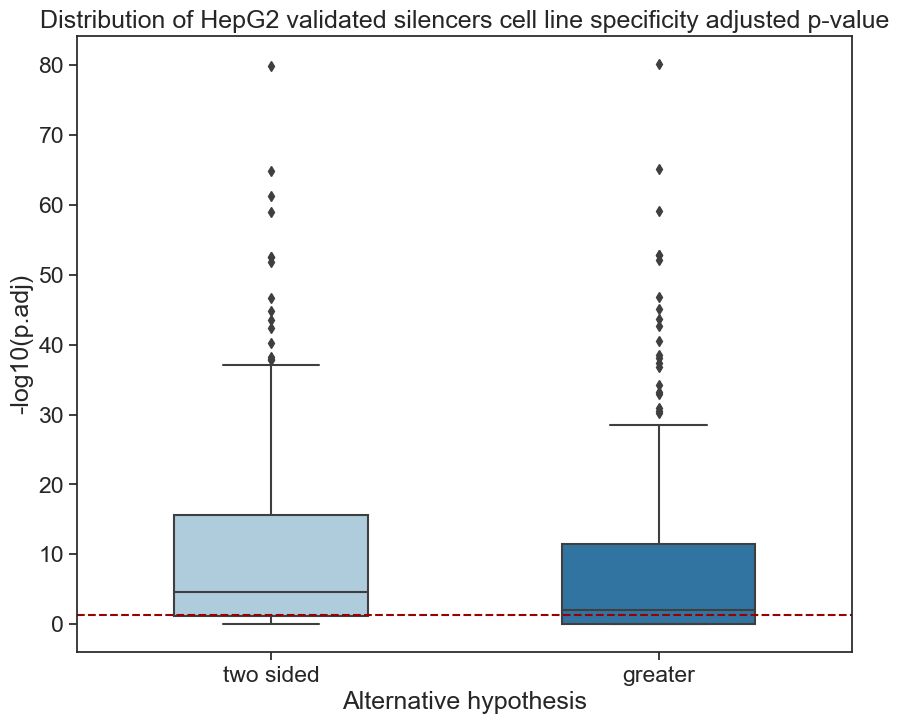

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'f_t_corr' and 'f_g_corr' are lists or arrays containing corrected p-values from the previous Python code
sns.set_theme(style='ticks',font_scale=1.5)
t = pd.DataFrame({'p_value': np.concatenate([f_t_corr, f_g_corr]),
                  'name': np.concatenate([np.repeat('two sided', len(f_t_corr)),
                                           np.repeat('greater', len(f_g_corr))])})

plt.figure(figsize=(10, 8))
sns.boxplot(data=t, x='name', y=-np.log10(t['p_value']), palette="Paired", width=0.5)
plt.title("Distribution of HepG2 validated silencers cell line specificity adjusted p-value")
plt.xlabel('Alternative hypothesis')
plt.ylabel('-log10(p.adj)')
# plt.ylim(0, 100)
plt.axhline(-np.log10(0.05), color="#990000", linestyle="dashed")
plt.savefig('pvalue_HepG2.png',dpi=450)
plt.show()

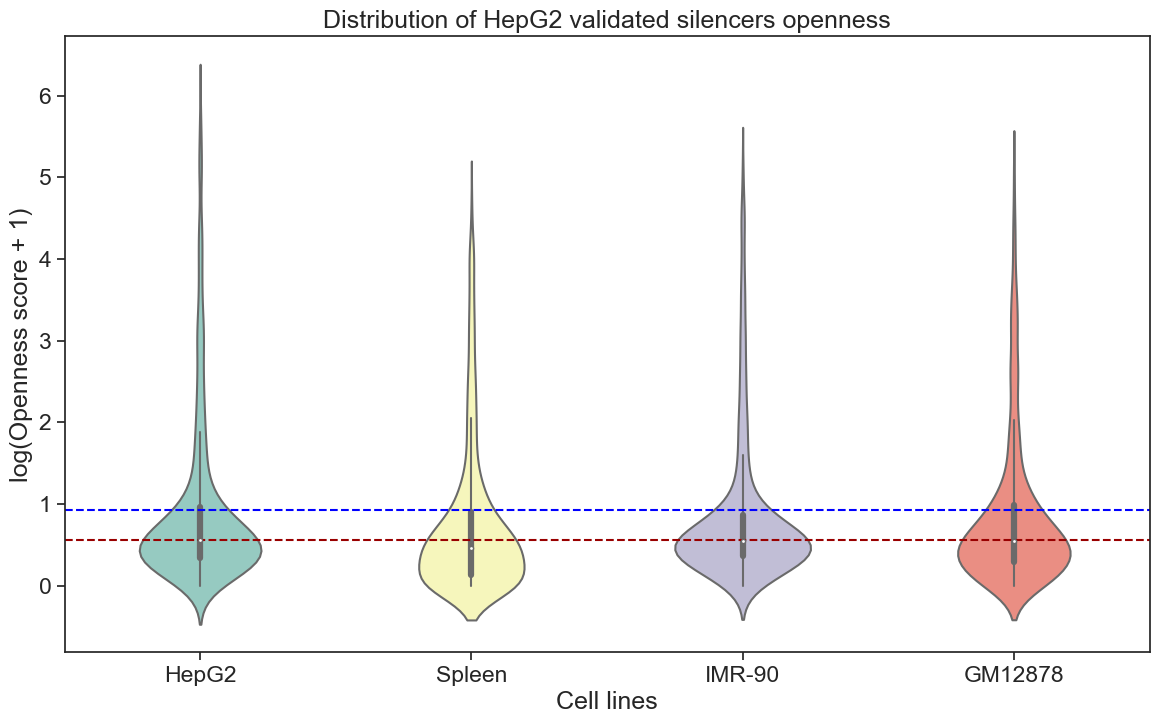

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'f_t_corr' and 'f_g_corr' are lists or arrays containing corrected p-values from the previous Python code
sns.set_theme(style='ticks',font_scale=1.5)
t = pd.DataFrame({'openness': np.concatenate([r_new[:,0], r_new[:,33],r_new[:,158],r_new[:,64]]),
                  'name': np.concatenate([np.repeat('HepG2', len(r_new[:,0])),
                                           np.repeat('Spleen', len(r_new[:,0])),
                                         np.repeat('IMR-90', len(r_new[:,0])),
                                         np.repeat('GM12878', len(r_new[:,0]))])})

plt.figure(figsize=(14, 8))
sns.violinplot(data=t, x='name', y=np.log(t['openness']+1), palette="Set3", width=0.5)
plt.title("Distribution of HepG2 validated silencers openness")
plt.xlabel('Cell lines')
plt.ylabel('log(Openness score + 1)')
# plt.ylim(0, 100)
plt.axhline(np.median(np.log(r_new[:,0]+1)), color="#990000", linestyle="dashed")
plt.axhline(np.mean(np.log(r_new[:,0]+1)), color="blue", linestyle="dashed")

plt.savefig('distribution_HepG2.png',dpi=450)
plt.show()